# JetSubstructure dataset


**Physics context:** <p>
At the extreme energies of the Large Hadron Collider, massive particles can be produced with such high Lorentz boost that their decays into hadrons (hadron jets) are collimated in such a way that the resulting particles overlap. Deducing whether the substructure of an observed jet is due to a single low-mass particle or to multiple decay objects of a high-mass particle is an important problem in LHC data analysis. Traditional approaches are based on high-level observables built from theoretical models of energy deposition in calorimeters and charged tracks parameters reconsrtcuted in the inner tracker, but the complexity of the data makes this task an excellent candidate for the application of deep learning tools. The jet constituents can be in fact represented either as 2D or 3D images,lending itself to the natural application of image classification techniques or Anomaly Detection models base don CNNs.

**Dataset:** <p>
The dataset is the *JetDataset*, in paricular the dataset that includes jet rapresentation through images. The images comes from the decay of different particles: *gluons, quarks, Ws, Zs, and top quarks*).

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# controlliamo se la GPU è disponibile e nel caso quale tipo di GPU
import torch
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu'
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Numero di GPU disponibili:  1
Tesla T4
Computation device: cuda



In [ ]:
# dataset download
# we'll clone a github repository containing the dataset
! git clone https://github.com/stefanogiagu/sgdatasets.git
! ls sgdatasets/

Cloning into 'sgdatasets'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9 (from 1)
Receiving objects: 100% (9/9), 76.45 MiB | 13.14 MiB/s, done.
dataset_jetStruct.npz  dataset_jetTag.npz


## Data Handling

**jet images** are represenetd as **2D histogram of the transverse momentum ($p_T$) deposited in each of 100x100 bins of a square window of the ($\eta,\phi$) plane, centered along the jet axis**.

The ground truth is incorporated in a ['j_g', 'j_q', 'j_w', 'j_z', 'j_t] vector of boolean, taking the form:

* $[1, 0, 0, 0, 0]$ for gluons
* $[0, 1, 0, 0, 0]$ for quarks
* $[0, 0, 1, 0, 0]$ for W bosons (with W  qq)
* $[0, 0, 0, 1, 0]$ for Z bosons (with Z  qq)
* $[0, 0, 0, 0, 1]$ for top quarks (with t  Wq  qqq)

In [ ]:
myfile = np.load('sgdatasets/dataset_jetStruct.npz')

target = myfile['target']
jetImage = myfile['jetImage']

print(target.shape, jetImage.shape) # 30000 jets from 5 categories. Gluons and Quarks can be considered normal jets, while jets from W, Z and top are different sources of anomalous jets

(30000, 5) (30000, 100, 100)


In [ ]:
# print the information for one of the jets

labels = ['gluon', 'quark', 'W', 'Z', 'top']

print('target: ', target[10])
print('so it\'s a jet of type: ',  labels[np.argmax(target[10])])

target:  [0. 0. 0. 1. 0.]
so it's a jet of type:  Z


In [ ]:
# convert one-hot labels in integers labels
p_label = np.argmax(target, axis=1)

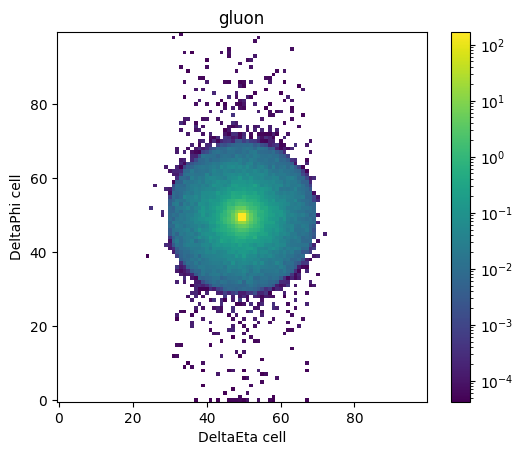

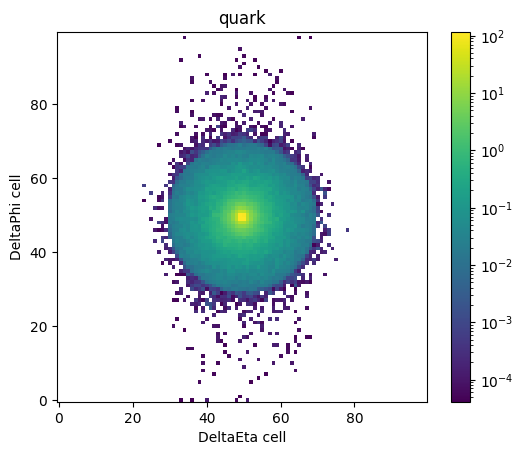

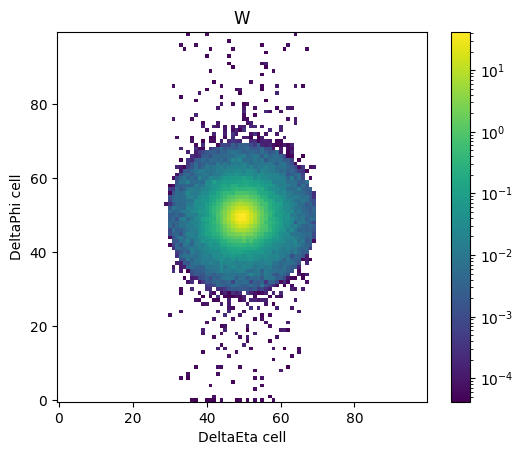

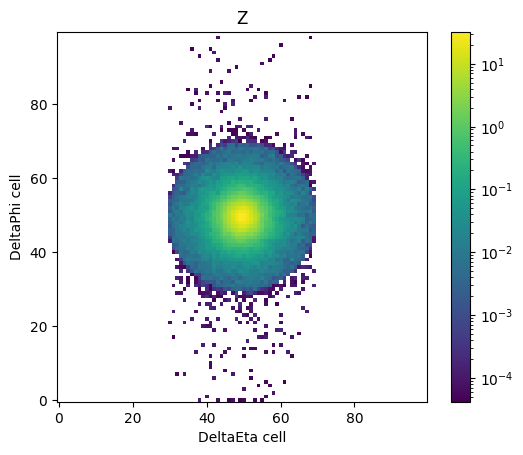

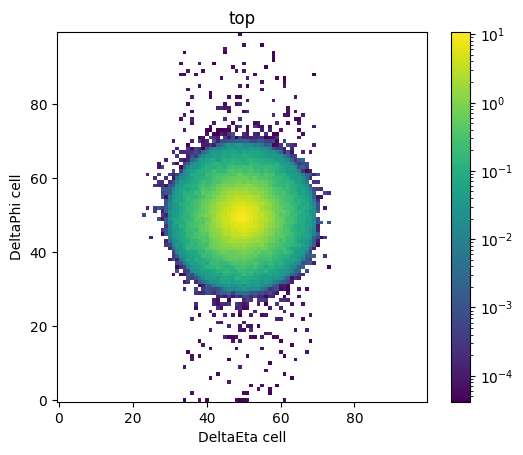

In [ ]:
# plots of sum of jet images for different jet catagories
from matplotlib.colors import LogNorm

# Ogni variabile delle seguenti contiene tutte le immagini per quella data classe
image_g = jetImage[np.argmax(target, axis=1) == 0]
image_q = jetImage[np.argmax(target, axis=1) == 1]
image_W = jetImage[np.argmax(target, axis=1) == 2]
image_Z = jetImage[np.argmax(target, axis=1) == 3]
image_t = jetImage[np.argmax(target, axis=1) == 4]
images = [image_q, image_g, image_W, image_Z, image_t]


for i in range(len(images)):
    SUM_Image = np.sum(images[i], axis = 0)
    plt.imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm())
    plt.colorbar()
    plt.title(labels[i])
    plt.xlabel('DeltaEta cell')
    plt.ylabel('DeltaPhi cell')
    plt.show()


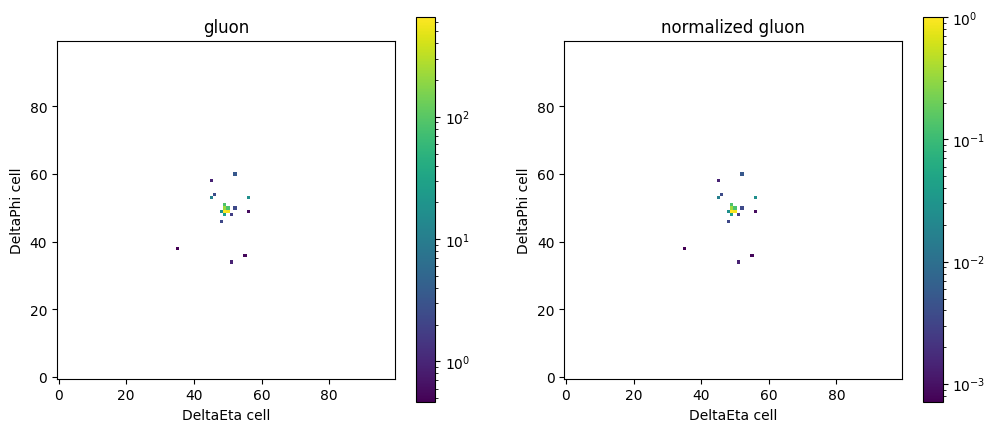

In [ ]:
# Applico una normalizzazione delle immagini dividendo ciascuna immagine per il suo massimo; ogni pixel dopo assume un valore in [0,1]

idx = 100

fig, axs = plt.subplots(1,2, figsize=(12,5))
im1 = axs[0].imshow(image_g[idx], origin='lower', norm=LogNorm())
axs[0].set_title('gluon')
axs[0].set_xlabel('DeltaEta cell')
axs[0].set_ylabel('DeltaPhi cell')
fig.colorbar(im1, ax=axs[0], orientation='vertical')
im2 = axs[1].imshow(image_g[idx]/np.max(image_g[idx]), origin='lower', norm=LogNorm())
axs[1].set_title('normalized gluon')
axs[1].set_xlabel('DeltaEta cell')
axs[1].set_ylabel('DeltaPhi cell')
fig.colorbar(im2, ax=axs[1], orientation='vertical')

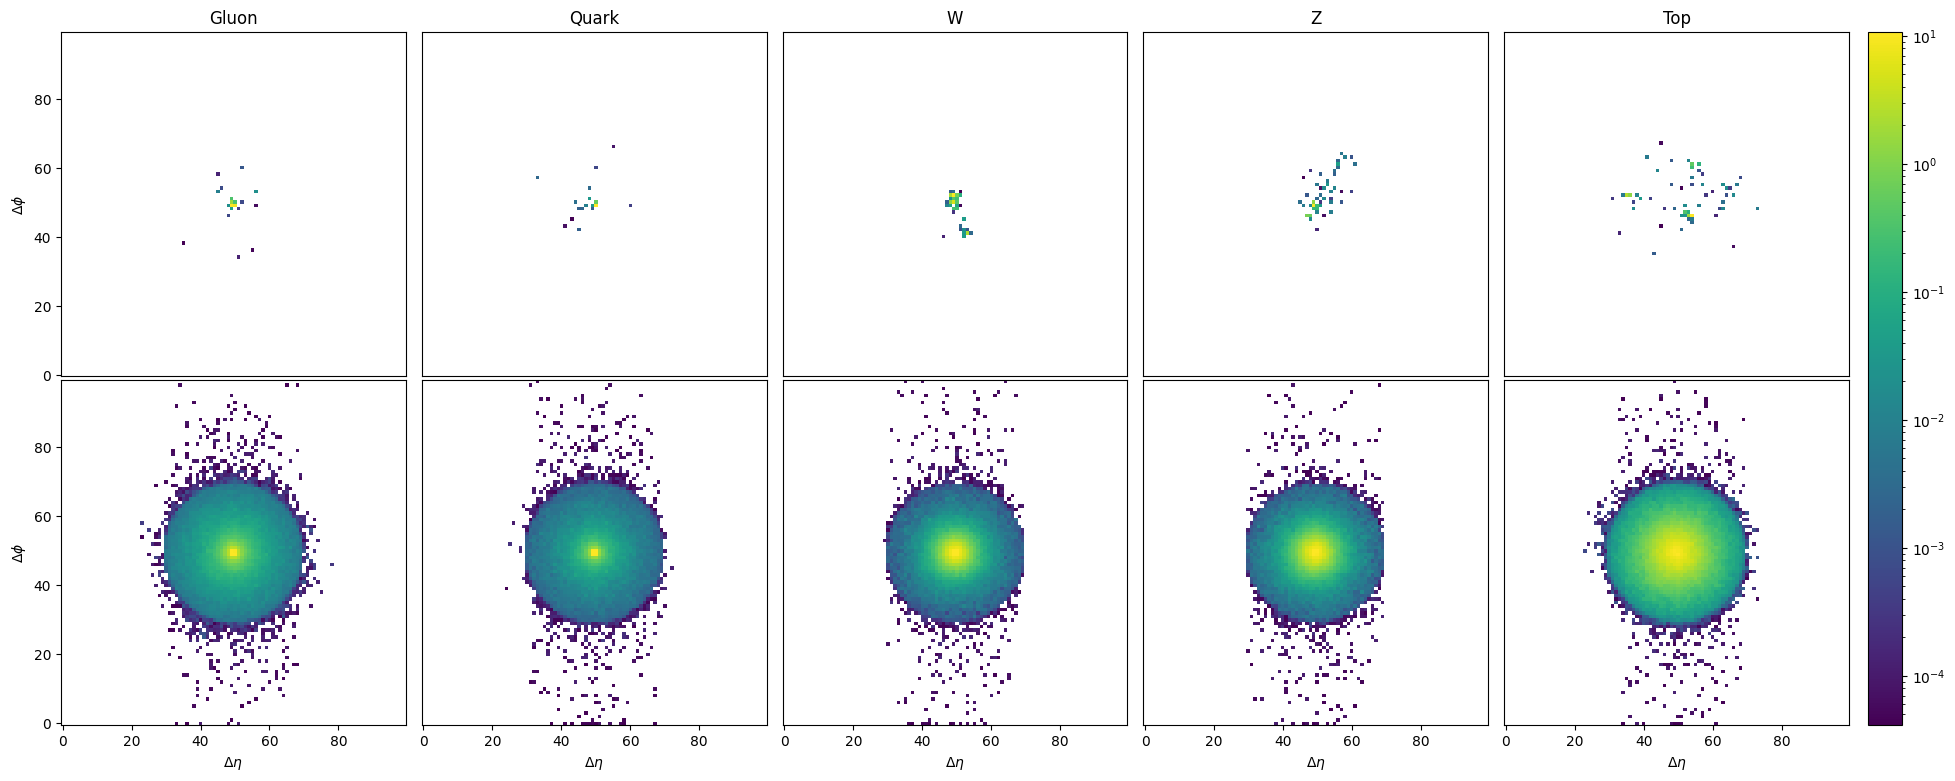

In [ ]:
from matplotlib.colors import LogNorm
from matplotlib import gridspec


# Creazione di una griglia 2x5 con una colorbar unica
fig, axs = plt.subplots(2, 5, figsize=(24, 9), gridspec_kw={'wspace': 0.00001, 'hspace': 0.01})

# Prima riga di immagini
titles = ['Gluon', 'Quark', 'W', 'Z', 'Top']
images = [image_g, image_q, image_W, image_Z, image_t]
for i in range(5):
    im = axs[0, i].imshow(images[i][idx], origin='lower', norm=LogNorm())
    if i == 0:
      axs[0, i].set_title(titles[i])
      axs[0, i].set_ylabel(r'$\Delta \phi$')
      axs[0, i].get_xaxis().set_visible(False)  # Disattiva l'asse x
    else:
      axs[0, i].set_title(titles[i])
      axs[0, i].get_xaxis().set_visible(False)  # Disattiva l'asse X
      axs[0, i].get_yaxis().set_visible(False)  # Disattiva l'asse Y

# Seconda riga di immagini
for i in range(5):
    SUM_Image = np.sum(images[i], axis = 0)
    im = axs[1, i].imshow(SUM_Image/float(images[i].shape[0]), origin='lower',norm=LogNorm())
    if i == 0:
      axs[1, i].set_xlabel(r'$\Delta \eta$')
      axs[1, i].set_ylabel(r'$\Delta \phi$')
    else:
      axs[1, i].get_yaxis().set_visible(False)  # Disattiva l'asse Y
      axs[1, i].set_xlabel(r'$\Delta \eta$')

# Aggiungere una colorbar unica a destra
cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.02, pad=0.01)

plt.show()

**Analisi del dataset**

In [ ]:
# Definisco una funzione norm_transform per la normalizzazione di una singola immagine

def norm_transform(images):
    norm_images = []
    for i in range(len(images)):
        item = images[i]/np.max(images[i])
        norm_images.append(item)
    return np.array(norm_images)

# Applico la trasformazione a tutto il dataset
norm_image_q = norm_transform(image_q)
norm_image_g = norm_transform(image_g)
norm_image_W = norm_transform(image_W)
norm_image_Z = norm_transform(image_Z)
norm_image_t = norm_transform(image_t)

In [ ]:
# Semplice verifica della corretta normalizzazione
max = []
min = []
for i in range(len(norm_image_q)):
  max.append(np.max(norm_image_q[i]))
  min.append(np.min(norm_image_q[i]))

print(f'max: {np.max(max)}, max_mean: {np.mean(max)}')
print(f'min: {np.min(min)}, min_mean: {np.mean(min)}')

max: 1.0, max_mean: 1.0
min: 0.0, min_mean: 0.0


In [ ]:
# Sposto il dataset normalizzato sulla GPU

norm_image_q = torch.tensor(norm_image_q).float().to(device)
norm_image_g = torch.tensor(norm_image_g).float().to(device)
norm_image_W = torch.tensor(norm_image_W).float().to(device)
norm_image_Z = torch.tensor(norm_image_Z).float().to(device)
norm_image_t = torch.tensor(norm_image_t).float().to(device)

In [ ]:
# Controllo il bilanciamento del dataset

print(f'''
Campioni per ciascuna particella:
quark : {norm_image_q.shape[0]}
gluoni: {norm_image_g.shape[0]}
W     : {norm_image_W.shape[0]}
Z     : {norm_image_Z.shape[0]}
top   : {norm_image_t.shape[0]}
''')


Campioni per ciascuna particella:
quark : 5911
gluoni: 6083
W     : 6006
Z     : 5975
top   : 6025



In [ ]:
# Definisco delle labels di tipo numero piuttosto che di tipo str

label_q = np.full(len(norm_image_q), 0)
label_g = np.full(len(norm_image_g), 1)
label_W = np.full(len(norm_image_W), 2)
label_Z = np.full(len(norm_image_Z), 3)
label_t = np.full(len(norm_image_t), 4)

In [ ]:
label_q = torch.tensor(label_q).int().to(device)
label_g = torch.tensor(label_g).int().to(device)
label_W = torch.tensor(label_W).int().to(device)
label_Z = torch.tensor(label_Z).int().to(device)
label_t = torch.tensor(label_t).int().to(device)

In [ ]:
# Eseguo una concatenzazione di array per creare nuovi dataset con le rispettive labels
# normal/abnormal ai fini dell'anomaly detection

normal_data = np.concatenate((norm_image_q.to('cpu'), norm_image_g.to('cpu')), axis=0)  # dataset con i dati normali
normal_labels = np.concatenate((label_q.to('cpu'), label_g.to('cpu')), axis=0)
abnormal_data = np.concatenate((norm_image_W.to('cpu'), norm_image_Z.to('cpu'), norm_image_t.to('cpu')), axis=0)  # dataset con i dati anomali
abnormal_labels = np.concatenate((label_W.to('cpu'), label_Z.to('cpu'), label_t.to('cpu')), axis=0)
normal_data_len = norm_image_q.shape[0] + norm_image_g.shape[0]
abnormal_data_len = norm_image_W.shape[0] + norm_image_Z.shape[0] + norm_image_t.shape[0]

normal_data = torch.tensor(normal_data).float().to(device)
normal_labels = torch.tensor(normal_labels).int().to(device)
abnormal_data = torch.tensor(abnormal_data).float().to(device)
abnormal_labels = torch.tensor(abnormal_labels).int().to(device)

print(f'''
Dati normali a disposizione: {normal_data_len}
Dati anomali a disposizione: {abnormal_data_len}
''')

print(f'''
normal_data: {normal_data.shape}
normal_labels: {normal_labels.shape}
anormal_data: {abnormal_data.shape}
anormal_labels: {abnormal_labels.shape}
''')


Dati normali a disposizione: 11994
Dati anomali a disposizione: 18006


normal_data: torch.Size([11994, 100, 100])
normal_labels: torch.Size([11994])
anormal_data: torch.Size([18006, 100, 100])
anormal_labels: torch.Size([18006])



In [ ]:
# Divido il dataset in train, vali e test, prendendo 80% per train, 10% per vali e 10% per test
from sklearn.model_selection import train_test_split

X_train, X_rest, Y_train, Y_rest = train_test_split(normal_data.to('cpu'), normal_labels.to('cpu'), test_size=0.20, random_state=123, shuffle=True)
X_vali, X_test, Y_vali, Y_test = train_test_split(X_rest.to('cpu'), Y_rest.to('cpu'), test_size=0.50, random_state=123, shuffle=True)

print('Suddivisione del dataset')
print(f'train: {X_train.shape}')
print(f'vali:  {X_vali.shape}')
print(f'test:  {X_test.shape}')

Suddivisione del dataset
train: torch.Size([9595, 100, 100])
vali:  torch.Size([1199, 100, 100])
test:  torch.Size([1200, 100, 100])


In [ ]:
# conversione in tensori torch dei vettori numpy

X_train_pt = torch.Tensor(X_train).float()
X_test_pt = torch.Tensor(X_test).float()
X_vali_pt = torch.Tensor(X_vali).float()
Y_train_pt = torch.Tensor(Y_train).int()
Y_test_pt = torch.Tensor(Y_test).int()
Y_vali_pt = torch.Tensor(Y_vali).int()

# reshape dei tensori da (n, 100, 100) a (n,1,100,100), aggiungo il canale (1 perché scala di grigi)
X_train_pt = X_train_pt.reshape(X_train_pt.shape[0], 1, 100, 100)
X_vali_pt = X_vali_pt.reshape(X_vali_pt.shape[0], 1, 100, 100)
X_test_pt = X_test_pt.reshape(X_test_pt.shape[0], 1, 100, 100)

print(X_train_pt.shape)
print(Y_train_pt.shape)
print(X_vali_pt.shape)
print(Y_vali_pt.shape)
print(X_test_pt.shape)
print(Y_test_pt.shape)

torch.Size([9595, 1, 100, 100])
torch.Size([9595])
torch.Size([1199, 1, 100, 100])
torch.Size([1199])
torch.Size([1200, 1, 100, 100])
torch.Size([1200])


In [ ]:
# dataset e dataloaders

from torch.utils.data import TensorDataset, DataLoader

# La batch size definisce quanti campioni vengono processati in ciascun passo

train_batch_size = 16
vali_batch_size = 2
print(f'Iterazioni train set per epoca: {int(X_train_pt.shape[0]/train_batch_size)}')
print(f'Iterazioni vali set per epoca: {int(X_vali_pt.shape[0]/vali_batch_size)}')

dataset_train = TensorDataset(X_train_pt, Y_train_pt)
train_dl = DataLoader(dataset_train, batch_size=train_batch_size, shuffle=True, num_workers=2, drop_last=True, pin_memory=True)

dataset_vali = TensorDataset(X_vali_pt, Y_vali_pt)
vali_dl = DataLoader(dataset_vali, batch_size=vali_batch_size, shuffle=True, num_workers=2, drop_last=True, pin_memory=True)

# per il test dataset uso una batch size 1
test_batch_size = 1
print(f'Iterazioni test set per epoca: {int(X_test_pt.shape[0]/test_batch_size)}')
dataset_test = TensorDataset(X_test_pt, Y_test_pt)
test_dl = DataLoader(dataset_test, batch_size=test_batch_size, shuffle=True, num_workers=2, drop_last=True, pin_memory=True)

Iterazioni train set per epoca: 599
Iterazioni vali set per epoca: 599
Iterazioni test set per epoca: 1200


**Costruzione della rete neurale**

In [ ]:
import torchvision

print(torch.__version__)
print(torchvision.__version__)

from torch import nn
import torch.nn as nn
import torch.nn.functional as F

2.5.1+cu121
0.20.1+cu121


In [ ]:
# Encoder --> dopo layer convoluzionali: dimensione out = (input - kernel +2*padding)/stride + 1

In [ ]:
# Convolutional Encoder Model

class Encoder(nn.Module):
    def __init__(self, hidden_channels, latent_dim):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=hidden_channels, kernel_size=4, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(hidden_channels)
        self.conv2 = nn.Conv2d(in_channels=hidden_channels, out_channels=hidden_channels*2, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(hidden_channels*2)
        self.conv3 = nn.Conv2d(in_channels=hidden_channels*2, out_channels=hidden_channels*4, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(hidden_channels*4)
        self.conv4 = nn.Conv2d(in_channels=hidden_channels*4, out_channels=hidden_channels*8, kernel_size=4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(hidden_channels*8)

        self.fc_z = nn.Linear(in_features=hidden_channels*8*6*6, out_features=latent_dim)

        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.bn1(self.conv1(x)))
        x = self.activation(self.bn2(self.conv2(x)))
        x = self.activation(self.bn3(self.conv3(x)))
        x = self.activation(self.bn4(self.conv4(x)))

        x = x.view(x.shape[0], -1)
        z = self.fc_z(x)

        return z

In [ ]:
hidden_channels = 32
latent_dim = 5

encoder = Encoder(hidden_channels=hidden_channels, latent_dim=latent_dim)
print(encoder)

from torchsummary import summary
if torch.cuda.is_available():
  summary(encoder.cuda(), input_size=(1,100,100))
else:
  summary(encoder, input_size=(1,100,100))

Encoder(
  (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc_z): Linear(in_features=9216, out_features=5, bias=True)
  (activation): ReLU()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 50, 50]             544
       BatchNorm2d-2           [-1, 32, 50,

In [ ]:
# Convolutional Decoder Model basato su nn.ConvTranspose2d

class Decoder(nn.Module):
    def __init__(self, hidden_channels, latent_dim):
        super().__init__()
        self.hidden_channels = hidden_channels

        self.fc_z = nn.Linear(in_features=latent_dim, out_features=hidden_channels*8*6*6)

        self.conv5 = nn.ConvTranspose2d(in_channels=hidden_channels*8, out_channels=hidden_channels*4, kernel_size=4, stride=2, padding=1)
        self.bn5 = nn.BatchNorm2d(hidden_channels*4)
        self.conv4 = nn.ConvTranspose2d(in_channels=hidden_channels*4, out_channels=hidden_channels*2, kernel_size=4, stride=2, padding=1, output_padding=1)
        self.bn4 = nn.BatchNorm2d(hidden_channels*2)
        self.conv3 = nn.ConvTranspose2d(in_channels=hidden_channels*2, out_channels=hidden_channels, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(hidden_channels)
        self.conv2 = nn.ConvTranspose2d(in_channels=hidden_channels, out_channels=1, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(1)

        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc_z(x))
        x = x.view(x.size(0), self.hidden_channels*8, 6, 6)
        x = self.activation(self.bn5(self.conv5(x)))
        x = self.activation(self.bn4(self.conv4(x)))
        x = self.activation(self.bn3(self.conv3(x)))
        out = torch.sigmoid(self.bn2(self.conv2(x)))  # uso sigmoid perché dopo utilizzo BCE come loss

        return out


In [ ]:
hidden_channels = 32
latent_dim = 5

decoder = Decoder(hidden_channels=hidden_channels, latent_dim=latent_dim)
print(decoder)

from torchsummary import summary
if torch.cuda.is_available():
  summary(decoder.cuda(), input_size=(latent_dim,))
else:
  summary(decoder, input_size=(latent_dim))

Decoder(
  (fc_z): Linear(in_features=5, out_features=9216, bias=True)
  (conv5): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): ConvTranspose2d(32, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation): ReLU()
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 9216]   

In [ ]:
# Full AE Model

class AE(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)

        return x_recon

In [ ]:
# Istanziamo il modello

hidden_channels = 32
latent_dim = 5

encoder = Encoder(hidden_channels=hidden_channels, latent_dim=latent_dim)
decoder = Decoder(hidden_channels=hidden_channels, latent_dim=latent_dim)
model = AE(encoder, decoder)

print(model)

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,100,100))
else:
  summary(model, input_size=(1,100,100))

AE(
  (encoder): Encoder(
    (conv1): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc_z): Linear(in_features=9216, out_features=5, bias=True)
    (activation): ReLU()
  )
  (decoder): Decoder(
    (fc_z): Linear(in_features=5, out_features=9216, bias=True)
    (conv5): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (bn5): BatchNorm2

In [ ]:
# testo il modello su un batch

model=model.to(device)

x,_ = next(iter(train_dl)) # è un AE non ci servono le label

x=x.to(device)

z = encoder(x)
xtilde = model(x)

print(x.shape)
print(z.shape)
print(xtilde.shape)

torch.Size([16, 1, 100, 100])
torch.Size([16, 5])
torch.Size([16, 1, 100, 100])


In [ ]:
from torch import nn

torch.cuda.empty_cache()

criterion = nn.BCELoss()

# Optimizer
LR = 0.001
opt = torch.optim.Adam(params=model.parameters(), lr=LR, weight_decay=1e-05)

# Scheduler per il learning rate
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(opt, mode='min', patience=5, factor=0.5)

model = model.to(device)

Epoch: 1 	 Time (s): 18.7812 	 Train Loss: 0.601545 	 Vali Loss: 0.489119 	 current LR: 0.001 	 tempo stimato: 18.78 min
Epoch: 2 	 Time (s): 19.2546 	 Train Loss: 0.402820 	 Vali Loss: 0.315713 	 current LR: 0.001
Epoch: 3 	 Time (s): 20.0489 	 Train Loss: 0.264663 	 Vali Loss: 0.212714 	 current LR: 0.001
Epoch: 4 	 Time (s): 18.8130 	 Train Loss: 0.184001 	 Vali Loss: 0.151763 	 current LR: 0.001
Epoch: 5 	 Time (s): 18.9456 	 Train Loss: 0.132961 	 Vali Loss: 0.111195 	 current LR: 0.001
Epoch: 6 	 Time (s): 19.0554 	 Train Loss: 0.097980 	 Vali Loss: 0.085492 	 current LR: 0.001
Epoch: 7 	 Time (s): 19.8250 	 Train Loss: 0.071933 	 Vali Loss: 0.061582 	 current LR: 0.001
Epoch: 8 	 Time (s): 18.8048 	 Train Loss: 0.054835 	 Vali Loss: 0.046917 	 current LR: 0.001
Epoch: 9 	 Time (s): 18.6945 	 Train Loss: 0.041892 	 Vali Loss: 0.041345 	 current LR: 0.001
Epoch: 10 	 Time (s): 19.3445 	 Train Loss: 0.032615 	 Vali Loss: 0.027839 	 current LR: 0.001
Epoch: 11 	 Time (s): 18.7928 	 

<ipython-input-95-689aeb4a1a08>:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


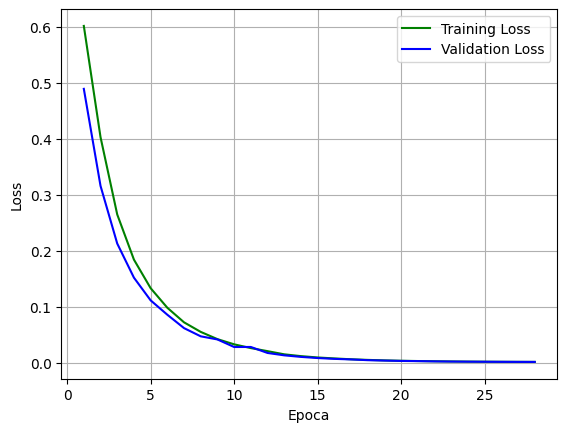

In [ ]:
import time
import matplotlib.pyplot as plt

# Loop di training
epochs = 60
hist_loss = []
vali_loss = []

# Parametri per l'early stopping
patience = 5   # Numero di epoch senza miglioramento
min_delta = 0.001  # Miglioramento minimo richiesto
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(epochs):
    t0 = time.time()

    # Training phase
    model.train()
    train_loss = 0
    train_counter = 0

    for xb, _ in train_dl:
        train_counter += 1
        xb = xb.to(device)

        # Forward pass
        xhat = model(xb)
        loss = criterion(xhat, xb)

        # Backward pass
        opt.zero_grad()
        loss.backward()
        opt.step()

        train_loss += loss.item()

    train_loss /= train_counter
    hist_loss.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0
    val_counter = 0

    with torch.no_grad():
        for xb_val, _ in vali_dl:
            val_counter += 1
            xb_val = xb_val.to(device)

            # Calcola la loss sul validation set
            xhat_val = model(xb_val)
            loss_val = criterion(xhat_val, xb_val)

            val_loss += loss_val.item()

    val_loss /= val_counter
    vali_loss.append(val_loss)

    # Scheduler update
    scheduler.step(val_loss)

    # Stampa le informazioni sull'epoca
    elapsed_time = time.time() - t0
    current_lr = scheduler.get_last_lr()[0]

    if epoch == 0:
      print(f"Epoch: {epoch+1} \t Time (s): {elapsed_time:.4f} \t Train Loss: {train_loss:.6f} \t Vali Loss: {val_loss:.6f} \t current LR: {current_lr} \t tempo stimato: {((elapsed_time*epochs)/60):.2f} min")
    else:
      print(f"Epoch: {epoch+1} \t Time (s): {elapsed_time:.4f} \t Train Loss: {train_loss:.6f} \t Vali Loss: {val_loss:.6f} \t current LR: {current_lr}")

   # Early stopping check
    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        patience_counter = 0
        # Salva i pesi migliori del modello
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        patience_counter += 1

    # Se la patience è superata, interrompe il training
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

# Carica i migliori pesi del modello
model.load_state_dict(torch.load('best_model.pt'))

# Plot della training loss e validation loss
plt.plot(range(1, len(hist_loss)+1), hist_loss, color='green', linestyle='-', label='Training Loss')
plt.plot(range(1, len(vali_loss)+1), vali_loss, color='blue', linestyle='-', label='Validation Loss')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salva il modello in Google Drive
torch.save(model.state_dict(), "/content/drive/My Drive/autoencoder2.pth")


# Se non fai così il modello viene salvato in locale e al termine della sessione va perso

In [ ]:
# Caricamento del modello salvato

import os
import torch

# Percorso per il file salvato
model_path = "/content/drive/My Drive/autoencoder2.pth"

# Controllo
if not os.path.exists(model_path):
    torch.save(model.state_dict(), model_path)
    print(f"Modello salvato in: {model_path}")
else:
    print(f"Modello esistente in: {model_path}")

# Ricostruzione del modello
encoder = Encoder(hidden_channels=hidden_channels, latent_dim=latent_dim)
decoder = Decoder(hidden_channels=hidden_channels, latent_dim=latent_dim)
model = AE(encoder, decoder)

# Caricamento dei pesi
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()  # Imposta il modello in modalità valutazione
    print("Modello caricato correttamente.")
else:
    print(f"Errore: Il file {model_path} non esiste.")

from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size=(1,100,100))
else:
  summary(model, input_size=(1,100,100))

Modello esistente in: /content/drive/My Drive/autoencoder2.pth


<ipython-input-31-f75967f61fe0>:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Modello caricato correttamente.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 50, 50]             544
       BatchNorm2d-2           [-1, 32, 50, 50]              64
              ReLU-3           [-1, 32, 50, 50]               0
            Conv2d-4           [-1, 64, 25, 25]          32,832
       BatchNorm2d-5           [-1, 64, 25, 25]             128
              ReLU-6           [-1, 64, 25, 25]               0
            Conv2d-7          [-1, 128, 12, 12]         131,200
       BatchNorm2d-8          [-1, 128, 12, 12]             256
              ReLU-9          [-1, 128, 12, 12]               0
           Conv2d-10            [-1, 256, 6, 6]         524,544
      BatchNorm2d-11            [-1, 256, 6, 6]             512
             ReLU-12            [-1, 256, 6, 6]               0
           Linear-13                    [-1, 5]          46,085
       

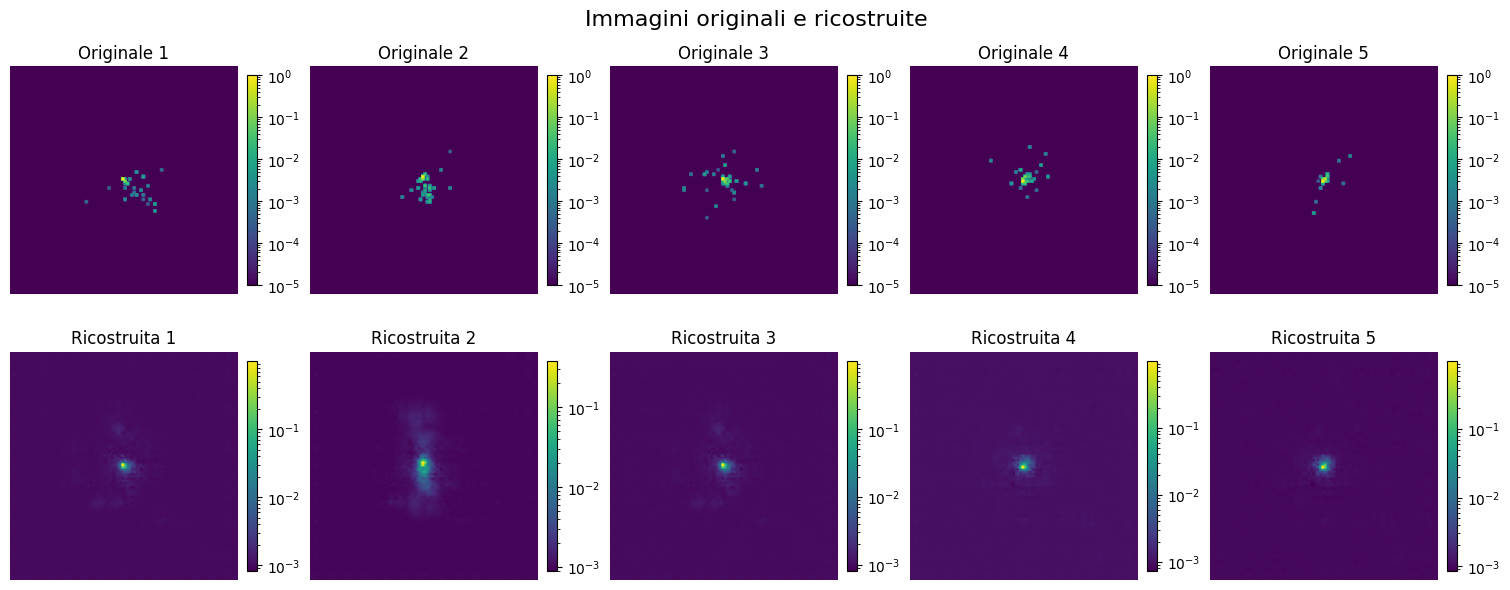

In [ ]:
# Visualizzazione di alcune immagini originali e ricostruite del test_set


def visualize_reconstruction(model, data_loader, num_images):
    model.eval()
    fig, axs = plt.subplots(2, num_images, figsize=(15, 6), constrained_layout=True)

    with torch.no_grad():
        for idx, (data, _) in enumerate(data_loader):
            if idx >= num_images:
                break
            data = data.to(device)
            recon = model(data)

            # Converti i dati in numpy
            original_img = data.cpu().numpy().squeeze()
            reconstructed_img = recon.cpu().numpy().squeeze()

            # Evita valori negativi o troppo bassi (necessari per LogNorm)
            original_img = np.clip(original_img, 1e-5, None)
            reconstructed_img = np.clip(reconstructed_img, 1e-5, None)

            # Original Image
            im = axs[0, idx].imshow(original_img, origin='lower', norm=LogNorm())
            axs[0, idx].set_title(f'Originale {idx+1}')
            axs[0, idx].axis('off')
            fig.colorbar(im, ax=axs[0, idx], orientation='vertical', fraction=0.046, pad=0.04)

            # Reconstructed Image
            im = axs[1, idx].imshow(reconstructed_img, origin='lower', norm=LogNorm())
            axs[1, idx].set_title(f'Ricostruita {idx+1}')
            axs[1, idx].axis('off')
            fig.colorbar(im, ax=axs[1, idx], orientation='vertical', fraction=0.046, pad=0.04)

    # Titolo complessivo
    fig.suptitle("Immagini originali e ricostruite", fontsize=16)
    plt.show()

# Chiamata al metodo di visualizzazione
visualize_reconstruction(model, test_dl, num_images=5)

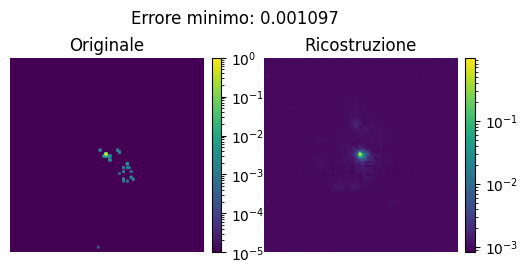

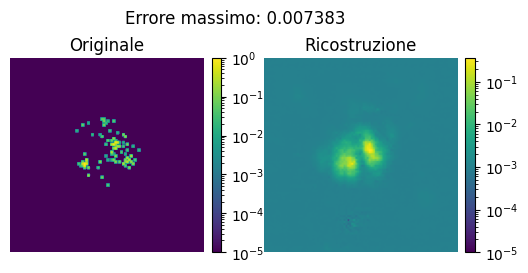

Media dell'errore di ricostruzione: 0.0018087148837124308 +/- 2.2695193543397474e-05


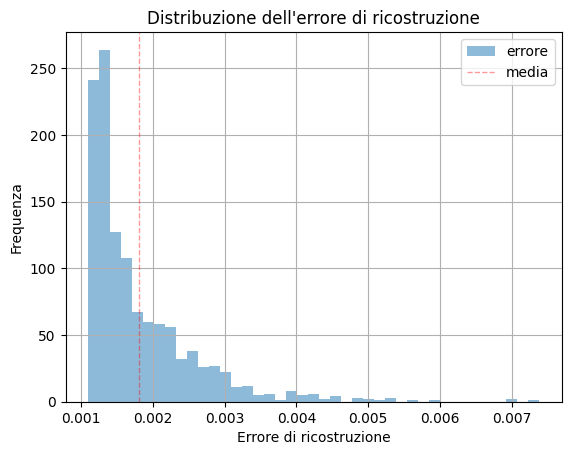

In [ ]:
# Uso BCE per avere una misura di quanto il modello ricostruisce bene le immagini perché è indicata per immagini normalizzate [0,1]

# import torch.nn.functional as F
model.eval()  # Modalità valutazione
reconstruction_losses = []

# Liste per salvare le immagini originali e ricostruite
original_images_list = []
reconstructed_images_list = []

for batch in test_dl:
    # Estrarre le immagini dal batch (batch[0] = immagini, batch[1] = etichette)
    original_images = batch[0].to(device)

    with torch.no_grad():
        reconstructed_images = model(original_images)

    # Calcola la BCE loss per ogni immagine singolarmente
    losses = F.binary_cross_entropy(reconstructed_images, original_images, reduction='none')
    losses = losses.mean(dim=[1, 2, 3])  # Media su tutte le dimensioni per ogni immagine

    # Salva le loss e le corrispondenti immagini originali e ricostruite
    reconstruction_losses.extend(losses.cpu().numpy())
    original_images_list.extend(original_images.cpu())
    reconstructed_images_list.extend(reconstructed_images.cpu())

# Trova gli indici della loss minima e massima
min_loss_idx = torch.argmin(torch.tensor(reconstruction_losses))
max_loss_idx = torch.argmax(torch.tensor(reconstruction_losses))

# Estrai le immagini con loss minima e massima
original_min_loss = original_images_list[min_loss_idx]
reconstructed_min_loss = reconstructed_images_list[min_loss_idx]

original_max_loss = original_images_list[max_loss_idx]
reconstructed_max_loss = reconstructed_images_list[max_loss_idx]

# Funzione per plottare le immagini originali e ricostruite
def plot_comparison(original, reconstructed, title, clip_min=1e-5):
    # Applica il clipping per LogNorm
    original_clipped = np.clip(original.numpy().squeeze(), clip_min, None)
    reconstructed_clipped = np.clip(reconstructed.numpy().squeeze(), clip_min, None)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    im1 = axs[0].imshow(original_clipped, origin='lower', norm=LogNorm())
    axs[0].set_title("Originale")
    axs[0].axis('off')
    fig.colorbar(im1, ax=axs[0], orientation='vertical', fraction=0.046, pad=0.04)

    im2 = axs[1].imshow(reconstructed_clipped, origin='lower', norm=LogNorm())
    axs[1].set_title("Ricostruzione")
    axs[1].axis('off')
    fig.colorbar(im2, ax=axs[1], orientation='vertical', fraction=0.046, pad=0.04)

    plt.suptitle(title)
    plt.show()

# Plot dell'immagine con loss minima
plot_comparison(original_min_loss, reconstructed_min_loss, title=f"Errore minimo: {reconstruction_losses[min_loss_idx]:.6f}")

# Plot dell'immagine con loss massima
plot_comparison(original_max_loss, reconstructed_max_loss, title=f"Errore massimo: {reconstruction_losses[max_loss_idx]:.6f}")

# Istogramma delle loss
average_loss = sum(reconstruction_losses) / len(reconstruction_losses)
std_loss = np.std(reconstruction_losses)
sem_loss = std_loss / np.sqrt(len(reconstruction_losses))  # Errore standard della media

print(f"Media dell'errore di ricostruzione: {average_loss} +/- {sem_loss}")

plt.hist(reconstruction_losses, bins='auto', alpha=0.5, label='errore')
plt.axvline(average_loss, color='r', linestyle='--', linewidth=1, label=f'media', alpha=0.4)
plt.xlabel("Errore di ricostruzione")
plt.ylabel("Frequenza")
plt.title("Distribuzione dell'errore di ricostruzione")
plt.legend()
plt.grid()
plt.show()

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


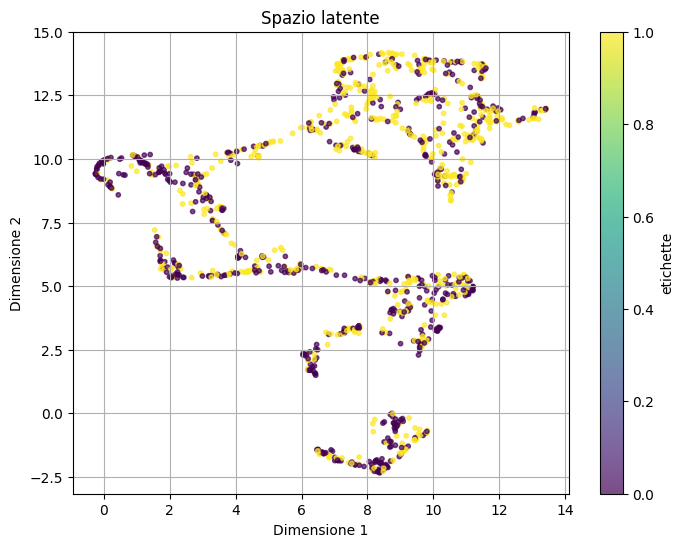

In [ ]:
# Rappresentazione dello spazio latente appreso tramite riduzione dimensionale fatta con UMAP

import umap

model.eval()

# Liste per le rappresentazioni latenti e le etichette
latent_representations = []
labels = []

with torch.no_grad():
    for xb, yb in test_dl:
        xb = xb.to(device)
        z = model.encoder(xb)  # ottiene le rappresentazioni latenti
        latent_representations.append(z.cpu().numpy())
        labels.append(yb.numpy())  # aggiunge le etichette

# Concateno le rappresentazioni latenti e le etichette
latent_representations = np.concatenate(latent_representations, axis=0)
labels = np.concatenate(labels, axis=0)

# Riduzione dimensionale con UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
latent_2d = reducer.fit_transform(latent_representations)

# Plot della rappresentazione ridotta a 2D
def plot_latent_space(latent_2d, labels=None):
    plt.figure(figsize=(8, 6))

    if labels is not None:
        scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
        plt.colorbar(scatter, label='etichette')
    else:
        plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c='blue', s=10, alpha=0.7)

    plt.title("Spazio latente")
    plt.xlabel("Dimensione 1")
    plt.ylabel("Dimensione 2")
    plt.grid(True)
    plt.show()

# Visualizza il risultato
plot_latent_space(latent_2d, labels)

# Anomaly Detection

In [ ]:
# aggiungo il canale ai dati anomali
norm_image_W = norm_image_W.reshape(norm_image_W.shape[0], 1, 100, 100)
norm_image_Z = norm_image_Z.reshape(norm_image_Z.shape[0], 1, 100, 100)
norm_image_t = norm_image_t.reshape(norm_image_t.shape[0], 1, 100, 100)
print(norm_image_W.shape)
print(norm_image_Z.shape)
print(norm_image_t.shape)

print(X_test.shape)

# Creo i dataloader
batch_size = 1
dataset_W = TensorDataset(norm_image_W, label_W)
W_dl = DataLoader(dataset_W, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
dataset_Z = TensorDataset(norm_image_Z, label_Z)
Z_dl = DataLoader(dataset_Z, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
dataset_t = TensorDataset(norm_image_t, label_t)
t_dl = DataLoader(dataset_t, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)

torch.cuda.empty_cache()

torch.Size([6006, 1, 100, 100])
torch.Size([5975, 1, 100, 100])
torch.Size([6025, 1, 100, 100])
torch.Size([1200, 100, 100])


**Anomaly Detection: Top Quark**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


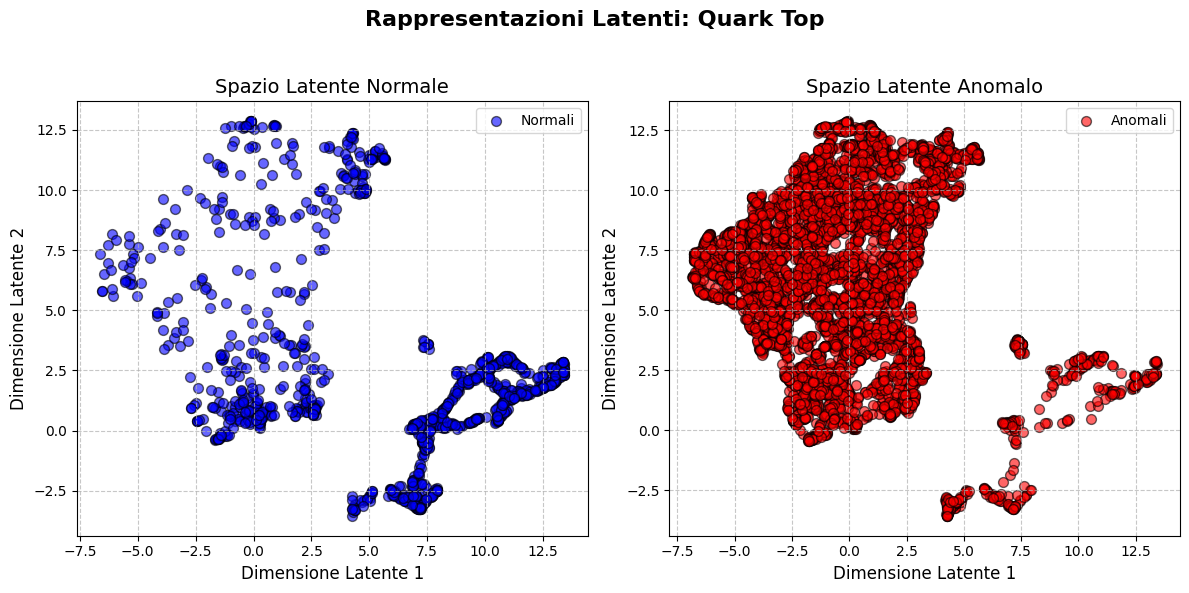

In [ ]:
# RAPPRESENTAZIONI LATENTI PER IL QUARK TOP

model = model.to(device)
model.eval()

# Liste per memorizzare le rappresentazioni latenti
normal_latents = []
anomalous_latents = []

with torch.no_grad():

    # test set
    for xb, _ in test_dl:
        xb = xb.to(device)
        latent = model.encoder(xb)
        normal_latents.append(latent.cpu().numpy())
    # quark top
    for yb, _ in t_dl:
        yb = yb.to(device)
        latent = model.encoder(yb)
        anomalous_latents.append(latent.cpu().numpy())

normal_latents = np.concatenate(normal_latents, axis=0)
anomalous_latents = np.concatenate(anomalous_latents, axis=0)

# Applico UMAP per ridurre la dimensionalità a 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
latents_2D = umap_reducer.fit_transform(np.vstack([normal_latents, anomalous_latents]))

# Divido i dati trasformati tra normali e anomali
n_samples = len(normal_latents)
normal_latents_2D = latents_2D[:n_samples]
anomalous_latents_2D = latents_2D[n_samples:]

# Plot dello spazio latente
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Rappresentazioni Latenti: Quark Top', fontsize=16, fontweight='bold')

# Subplot 1: Normali
axs[0].scatter(normal_latents_2D[:, 0], normal_latents_2D[:, 1],
               label="Normali", alpha=0.6, c='blue', edgecolor='k', s=50)
axs[0].set_title("Spazio Latente Normale", fontsize=14)
axs[0].set_xlabel("Dimensione Latente 1", fontsize=12)
axs[0].set_ylabel("Dimensione Latente 2", fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Anomali
axs[1].scatter(anomalous_latents_2D[:, 0], anomalous_latents_2D[:, 1],
               label="Anomali", alpha=0.6, c='red', edgecolor='k', s=50)
axs[1].set_title("Spazio Latente Anomalo", fontsize=14)
axs[1].set_xlabel("Dimensione Latente 1", fontsize=12)
axs[1].set_ylabel("Dimensione Latente 2", fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Errore di ricostruzione medio sul test set: 0.0018087148855556734 +\- 2.2695193202483382e-05
Errore di ricostruzione medio sul quark top set:    0.0028161283816825365 +\- 1.21109996755237e-05
Massimo della distribuzione dell'errore di ricostruzione sul test set: 0.001327
Massimo della distribuzione dell'errore di ricostruzione sul quark top set:    0.002202
Distanza tra i massimi: 0.0008742


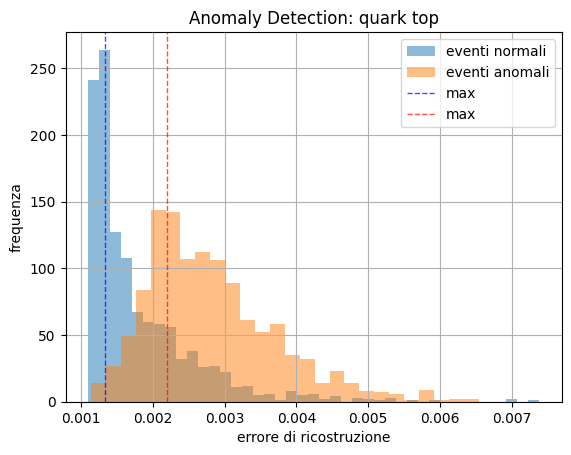

In [ ]:
# Distribuzioni dell'errore di ricostruzione

model.eval()
test_loss = []
t_loss = []
y_true = []

criterion = nn.BCELoss()

with torch.no_grad():
  for xb, labels in test_dl:
    xb, labels = xb.to(device), labels.to(device)
    xhat = model(xb)
    xloss = criterion(xhat, xb)
    test_loss.append(xloss.item())
    # Normalizzazione etichette: 0 e 1 -> 0 (normali)
    labels = labels.cpu().numpy()
    labels = np.array([0 if label in [0, 1] else 1 for label in labels])
    y_true.extend(labels)


  for yb, labels in t_dl:
    yb, labels = yb.to(device), labels.to(device)
    yhat = model(yb)
    yloss = criterion(yhat, yb)
    t_loss.append(yloss.item())
    # Normalizzazione etichette: 4 -> 1 (anomali)
    labels = labels.cpu().numpy()
    labels = np.array([0 if label in [0, 1] else 1 for label in labels])
    y_true.extend(labels)

# Calcola le medie delle loss
average_test_loss = sum(test_loss) / len(test_loss)
std_test_loss = np.std(test_loss)
sem_test_loss = std_test_loss / np.sqrt(len(test_loss))  # Errore standard della media

average_t_loss = sum(t_loss) / len(t_loss)
std_t_loss = np.std(t_loss)
sem_t_loss = std_t_loss / np.sqrt(len(t_loss))  # Errore standard della media

# Calcola gli istogrammi
test_hist, test_bins = np.histogram(test_loss, bins='auto')
t_hist, t_bins = np.histogram(t_loss, bins='auto')

# Trova il valore di loss corrispondente al picco di frequenza
test_peak_idx = np.argmax(test_hist)
test_peak_loss = (test_bins[test_peak_idx] + test_bins[test_peak_idx + 1]) / 2

t_peak_idx = np.argmax(t_hist)
t_peak_loss = (t_bins[t_peak_idx] + t_bins[t_peak_idx + 1]) / 2

print(f"Errore di ricostruzione medio sul test set: {average_test_loss} +\- {sem_test_loss}")
print(f"Errore di ricostruzione medio sul quark top set:    {average_t_loss} +\- {sem_t_loss}")
print(f"Massimo della distribuzione dell'errore di ricostruzione sul test set: {test_peak_loss:.6f}")
print(f"Massimo della distribuzione dell'errore di ricostruzione sul quark top set:    {t_peak_loss:.6f}")
print(f"Distanza tra i massimi: {(t_peak_loss-test_peak_loss):.7f}")

plt.hist(test_loss, bins='auto', label='eventi normali', alpha=0.5)
plt.hist(t_loss[:len(test_loss)], bins='auto', label='eventi anomali', alpha=0.5)
plt.axvline(test_peak_loss, color='b', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(t_peak_loss, color='r', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.xlabel("errore di ricostruzione")
plt.ylabel("frequenza")
plt.title("Anomaly Detection: quark top")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Incertezza sul valore massimo della distribuzione: uso la deviazione standard dei valori vicini al massimo
import math

# TEST
# Finestra attorno al picco
bin_width = test_bins[1] - test_bins[0]
window_width = 1*bin_width
window_min = test_peak_loss - window_width / 2
window_max = test_peak_loss + window_width / 2

# Filtro i dati che rientrano nella finestra
losses_in_window = [loss for loss in test_loss if window_min <= loss <= window_max]

# Deviazione standard dei valori nella finestra
if len(losses_in_window) > 1:
    std_dev_peak_test = np.std(losses_in_window)
else:
    std_dev_peak_test = 0  # Nessuna incertezza significativa calcolabile

print(f"Picco di frequenza (test): {test_peak_loss} +/- {std_dev_peak_test}")


# QUARK TOP
# Finestra attorno al picco
bin_width = t_bins[1] - t_bins[0]
window_width = 2*bin_width
window_min = t_peak_loss - window_width / 2
window_max = t_peak_loss + window_width / 2

# Filtro i dati che rientrano nella finestra
losses_in_window = [loss for loss in t_loss if window_min <= loss <= window_max]

# Deviazione standard dei valori nella finestra
if len(losses_in_window) > 1:
    std_dev_peak_t = np.std(losses_in_window)
else:
    std_dev_peak_t = 0  # Nessuna incertezza significativa calcolabile

print(f"Picco di frequenza (top): {t_peak_loss} +/- {std_dev_peak_t}")

# Distanza
print(f'\nDistanza tra i massimi: {-test_peak_loss + t_peak_loss} +\- {math.sqrt( std_dev_peak_test**2 + std_dev_peak_t**2 )}')

Picco di frequenza (test): 0.0013273330802870231 +/- 4.322582523126321e-05
Picco di frequenza (top): 0.002201513489337125 +/- 7.215119870209328e-05

Distanza tra i massimi: 0.000874180409050102 +\- 8.410866448275504e-05


AUC: 0.839127 ± 0.007358
Soglia ottimale: 0.002014 ± 0.000051
Precision: 0.938362 ± 0.003396
Recall: 0.823807 ± 0.022965
F1 Score: 0.877180 ± 0.012663


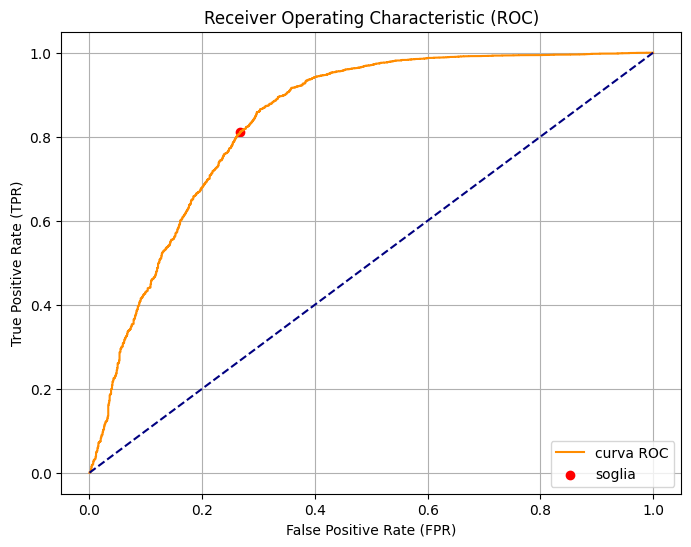

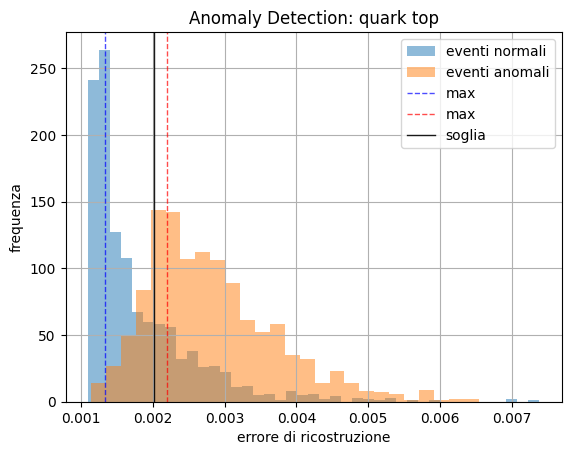

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

all_losses = np.concatenate((test_loss, t_loss))
y_true = np.array(y_true)

# Funzione per calcolare le metriche su un campione
def compute_metrics(y_true_sample, all_losses_sample):
    fpr, tpr, thresholds = roc_curve(y_true_sample, all_losses_sample)
    roc_auc = auc(fpr, tpr)

    # Soglia ottimale
    optimal_idx = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
    optimal_threshold = thresholds[optimal_idx]

    # Predizioni usando la soglia ottimale
    y_pred_sample = (all_losses_sample > optimal_threshold).astype(int)

    # Calcolo metriche
    precision = precision_score(y_true_sample, y_pred_sample)
    recall = recall_score(y_true_sample, y_pred_sample)
    f1 = f1_score(y_true_sample, y_pred_sample)

    return roc_auc, optimal_threshold, precision, recall, f1, fpr, tpr, optimal_idx

# Bootstrapping
n_bootstraps = 1000
rng = np.random.RandomState(42)

roc_aucs, thresholds, precisions, recalls, f1_scores = [], [], [], [], []
for _ in range(n_bootstraps):
    indices = rng.choice(np.arange(len(y_true)), size=len(y_true), replace=True)
    y_true_sample = y_true[indices]
    all_losses_sample = all_losses[indices]

    metrics = compute_metrics(y_true_sample, all_losses_sample)
    roc_aucs.append(metrics[0])
    thresholds.append(metrics[1])
    precisions.append(metrics[2])
    recalls.append(metrics[3])
    f1_scores.append(metrics[4])

# Calcolo statistiche
roc_auc_mean, roc_auc_std = np.mean(roc_aucs), np.std(roc_aucs)
optimal_threshold_mean, optimal_threshold_std = np.mean(thresholds), np.std(thresholds)
precision_mean, precision_std = np.mean(precisions), np.std(precisions)
recall_mean, recall_std = np.mean(recalls), np.std(recalls)
f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

print(f"AUC: {roc_auc_mean:.6f} ± {roc_auc_std:.6f}")
print(f"Soglia ottimale: {optimal_threshold_mean:.6f} ± {optimal_threshold_std:.6f}")
print(f"Precision: {precision_mean:.6f} ± {precision_std:.6f}")
print(f"Recall: {recall_mean:.6f} ± {recall_std:.6f}")
print(f"F1 Score: {f1_mean:.6f} ± {f1_std:.6f}")

# Plot della curva ROC dall'ultimo bootstrap
fpr, tpr, thresholds = roc_curve(y_true, all_losses)
optimal_idx = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"curva ROC", color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"soglia")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot istogrammi con threshold
plt.hist(test_loss, bins='auto', label='eventi normali', alpha=0.5)
plt.hist(t_loss[:len(test_loss)], bins='auto', label='eventi anomali', alpha=0.5)
plt.axvline(test_peak_loss, color='b', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(t_peak_loss, color='r', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(optimal_threshold_mean, color='black', linestyle='-', linewidth=1, label=f'soglia', alpha=0.9)
plt.xlabel("errore di ricostruzione")
plt.ylabel("frequenza")
plt.title("Anomaly Detection: quark top")
plt.legend()
plt.grid()
plt.show()

**Anomaly Detection: W Boson**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


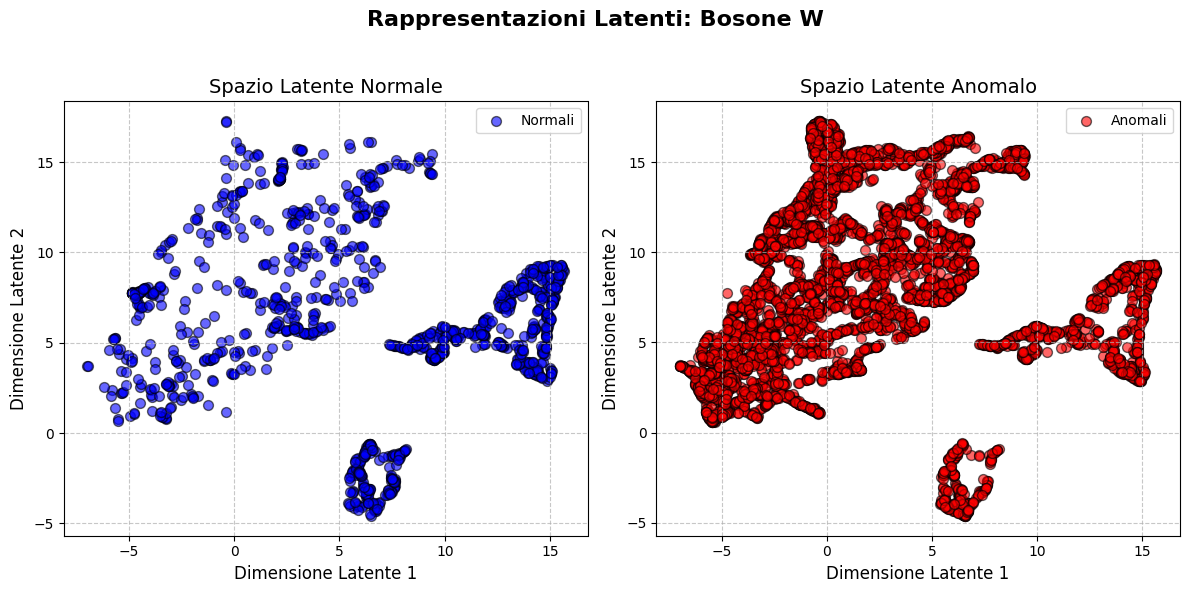

In [ ]:
# RAPPRESENTAZIONI LATENTI PER IL BOSONE W

model = model.to(device)
model.eval()

normal_latents = []
anomalous_latents = []

with torch.no_grad():
    for xb, _ in test_dl:
        xb = xb.to(device)
        latent = model.encoder(xb)
        normal_latents.append(latent.cpu().numpy())

    for yb, _ in W_dl:
        yb = yb.to(device)
        latent = model.encoder(yb)
        anomalous_latents.append(latent.cpu().numpy())

normal_latents = np.concatenate(normal_latents, axis=0)
anomalous_latents = np.concatenate(anomalous_latents, axis=0)

# Applica UMAP per ridurre la dimensionalità a 2D
umap_reducer = umap.UMAP(n_components=2, random_state=42)
latents_2D = umap_reducer.fit_transform(np.vstack([normal_latents, anomalous_latents]))

n_samples = len(normal_latents)
normal_latents_2D = latents_2D[:n_samples]
anomalous_latents_2D = latents_2D[n_samples:]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Rappresentazioni Latenti: Bosone W', fontsize=16, fontweight='bold')

# Subplot 1: Normali
axs[0].scatter(normal_latents_2D[:, 0], normal_latents_2D[:, 1],
               label="Normali", alpha=0.6, c='blue', edgecolor='k', s=50)
axs[0].set_title("Spazio Latente Normale", fontsize=14)
axs[0].set_xlabel("Dimensione Latente 1", fontsize=12)
axs[0].set_ylabel("Dimensione Latente 2", fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Anomali
axs[1].scatter(anomalous_latents_2D[:, 0], anomalous_latents_2D[:, 1],
               label="Anomali", alpha=0.6, c='red', edgecolor='k', s=50)
axs[1].set_title("Spazio Latente Anomalo", fontsize=14)
axs[1].set_xlabel("Dimensione Latente 1", fontsize=12)
axs[1].set_ylabel("Dimensione Latente 2", fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Errore di ricostruzione medio sul test set: 0.0018087148845855458 +\- 2.2695193113015964e-05
Errore di ricostruzione medio sul bosone W set:    0.0018896461464309598 +\- 5.953693149669747e-06
Massimo della distribuzione dell'errore di ricostruzione sul test set: 0.001327
Massimo della distribuzione dell'errore di ricostruzione sul bosone W Set:    0.001775
Distanza tra i massimi: 0.0004472


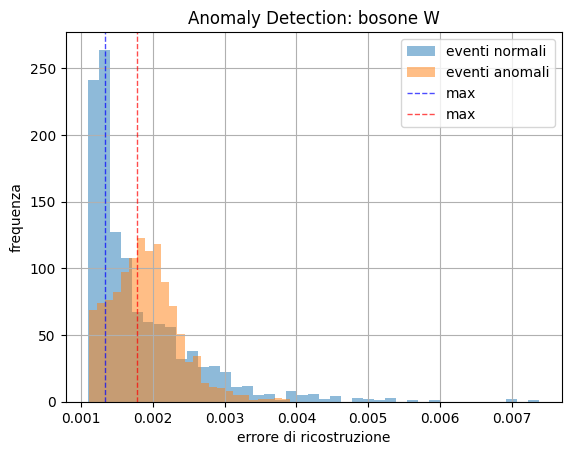

In [ ]:
# Distribuzioni dell'errore di ricostruzione

model.eval()
test_loss = []
W_loss = []
y_true = []  # Lista per le etichette reali

criterion = nn.BCELoss()

with torch.no_grad():
  for xb, labels in test_dl:
    xb, labels = xb.to(device), labels.to(device)
    xhat = model(xb)
    xloss = criterion(xhat, xb)
    test_loss.append(xloss.item())
    # Normalizzazione etichette: 0 e 1 -> 0 (normali)
    labels = labels.cpu().numpy()
    labels = np.array([0 if label in [0, 1] else 1 for label in labels])
    y_true.extend(labels)

  for yb, labels in W_dl:
    yb, labels = yb.to(device), labels.to(device)
    yhat = model(yb)
    yloss = criterion(yhat, yb)
    W_loss.append(yloss.item())
    # Normalizzazione etichette: 4 -> 1 (anomali)
    labels = labels.cpu().numpy()
    labels = np.array([0 if label in [0, 1] else 1 for label in labels])
    y_true.extend(labels)

# Calcola le medie delle loss
average_test_loss = sum(test_loss) / len(test_loss)
std_test_loss = np.std(test_loss)
sem_test_loss = std_test_loss / np.sqrt(len(test_loss))  # Errore standard della media

average_W_loss = sum(W_loss) / len(W_loss)
std_W_loss = np.std(W_loss)
sem_W_loss = std_W_loss / np.sqrt(len(W_loss))  # Errore standard della media

# Istogrammi
test_hist, test_bins = np.histogram(test_loss, bins='auto')
W_hist, W_bins = np.histogram(W_loss, bins='auto')

# Trovo il valore di loss corrispondente al picco di frequenza
test_peak_idx = np.argmax(test_hist)
test_peak_loss = (test_bins[test_peak_idx] + test_bins[test_peak_idx + 1]) / 2

W_peak_idx = np.argmax(W_hist)
W_peak_loss = (W_bins[W_peak_idx] + W_bins[W_peak_idx + 1]) / 2

print(f"Errore di ricostruzione medio sul test set: {average_test_loss} +\- {sem_test_loss}")
print(f"Errore di ricostruzione medio sul bosone W set:    {average_W_loss} +\- {sem_W_loss}")
print(f"Massimo della distribuzione dell'errore di ricostruzione sul test set: {test_peak_loss:.6f}")
print(f"Massimo della distribuzione dell'errore di ricostruzione sul bosone W set:    {W_peak_loss:.6f}")
print(f"Distanza tra i massimi: {(W_peak_loss-test_peak_loss):.7f}")

plt.hist(test_loss, bins='auto', label='eventi normali', alpha=0.5)
plt.hist(W_loss[:len(test_loss)], bins='auto', label='eventi anomali', alpha=0.5)
plt.axvline(test_peak_loss, color='b', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(W_peak_loss, color='r', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.xlabel("errore di ricostruzione")
plt.ylabel("frequenza")
plt.title("Anomaly Detection: bosone W")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Incertezza sul valore massimo della distribuzione: uso la deviazione standard dei valori vicini al massimo
import math

# TEST
bin_width = test_bins[1] - test_bins[0]
window_width = 1*bin_width
window_min = test_peak_loss - window_width / 2
window_max = test_peak_loss + window_width / 2

losses_in_window = [loss for loss in test_loss if window_min <= loss <= window_max]

if len(losses_in_window) > 1:
    std_dev_peak_test = np.std(losses_in_window)
else:
    std_dev_peak_test = 0

print(f"Picco di frequenza (test): {test_peak_loss} +/- {std_dev_peak_test}")


# BOSONE W
bin_width = W_bins[1] - W_bins[0]
window_width = 2*bin_width
window_min = W_peak_loss - window_width / 2
window_max = W_peak_loss + window_width / 2

losses_in_window = [loss for loss in W_loss if window_min <= loss <= window_max]

if len(losses_in_window) > 1:
    std_dev_peak_W = np.std(losses_in_window)
else:
    std_dev_peak_W = 0

print(f"Picco di frequenza (W): {W_peak_loss} +/- {std_dev_peak_W}")

# Distanza
print(f'\nDistanza tra i massimi: {-test_peak_loss + W_peak_loss} +\- {math.sqrt( std_dev_peak_test**2 + std_dev_peak_W**2 )}')

Picco di frequenza (test): 0.0013273330802870231 +/- 4.322582479011422e-05
Picco di frequenza (W): 0.0017745827955088383 +/- 3.7013639419552245e-05

Distanza tra i massimi: 0.0004472497152218152 +\- 5.690765705831057e-05


AUC: 0.621819 ± 0.009987
Soglia ottimale: 0.001638 ± 0.000025
Precision: 0.891684 ± 0.004519
Recall: 0.687584 ± 0.019903
F1 Score: 0.776282 ± 0.012892


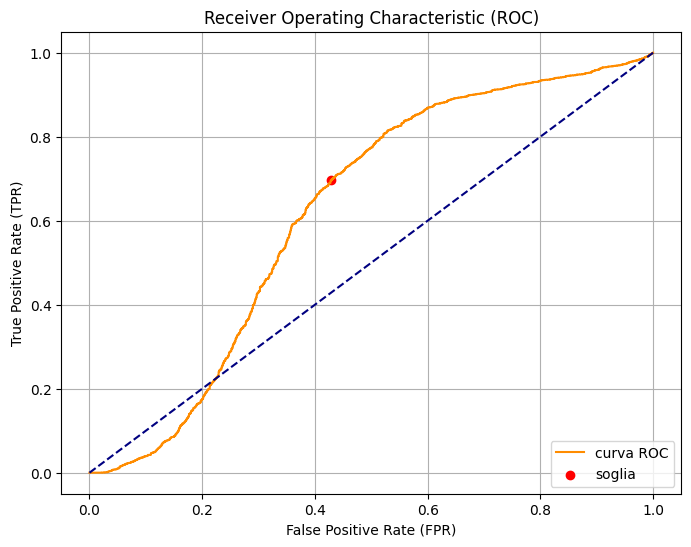

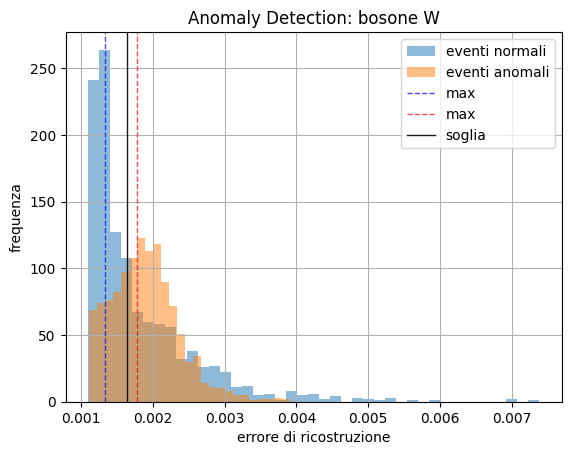

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

all_losses = np.concatenate((test_loss, W_loss))
y_true = np.array(y_true)

def compute_metrics(y_true_sample, all_losses_sample):
    fpr, tpr, thresholds = roc_curve(y_true_sample, all_losses_sample)
    roc_auc = auc(fpr, tpr)

    # Soglia ottimale
    optimal_idx = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
    optimal_threshold = thresholds[optimal_idx]

    # Predizioni usando la soglia ottimale
    y_pred_sample = (all_losses_sample > optimal_threshold).astype(int)

    # Calcolo metriche
    precision = precision_score(y_true_sample, y_pred_sample)
    recall = recall_score(y_true_sample, y_pred_sample)
    f1 = f1_score(y_true_sample, y_pred_sample)

    return roc_auc, optimal_threshold, precision, recall, f1, fpr, tpr, optimal_idx

# Bootstrapping
n_bootstraps = 1000
rng = np.random.RandomState(42)

roc_aucs, thresholds, precisions, recalls, f1_scores = [], [], [], [], []
for _ in range(n_bootstraps):
    indices = rng.choice(np.arange(len(y_true)), size=len(y_true), replace=True)
    y_true_sample = y_true[indices]
    all_losses_sample = all_losses[indices]

    metrics = compute_metrics(y_true_sample, all_losses_sample)
    roc_aucs.append(metrics[0])
    thresholds.append(metrics[1])
    precisions.append(metrics[2])
    recalls.append(metrics[3])
    f1_scores.append(metrics[4])

# Calcolo statistiche
roc_auc_mean, roc_auc_std = np.mean(roc_aucs), np.std(roc_aucs)
optimal_threshold_mean, optimal_threshold_std = np.mean(thresholds), np.std(thresholds)
precision_mean, precision_std = np.mean(precisions), np.std(precisions)
recall_mean, recall_std = np.mean(recalls), np.std(recalls)
f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

print(f"AUC: {roc_auc_mean:.6f} ± {roc_auc_std:.6f}")
print(f"Soglia ottimale: {optimal_threshold_mean:.6f} ± {optimal_threshold_std:.6f}")
print(f"Precision: {precision_mean:.6f} ± {precision_std:.6f}")
print(f"Recall: {recall_mean:.6f} ± {recall_std:.6f}")
print(f"F1 Score: {f1_mean:.6f} ± {f1_std:.6f}")

# Plot della curva ROC dall'ultimo bootstrap
fpr, tpr, thresholds = roc_curve(y_true, all_losses)
optimal_idx = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"curva ROC", color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"soglia")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot istogrammi con threshold
plt.hist(test_loss, bins='auto', label='eventi normali', alpha=0.5)
plt.hist(W_loss[:len(test_loss)], bins='auto', label='eventi anomali', alpha=0.5)
plt.axvline(test_peak_loss, color='b', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(W_peak_loss, color='r', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(optimal_threshold_mean, color='black', linestyle='-', linewidth=1, label=f'soglia', alpha=0.9)
plt.xlabel("errore di ricostruzione")
plt.ylabel("frequenza")
plt.title("Anomaly Detection: bosone W")
plt.legend()
plt.grid()
plt.show()

**Anomaly Detection: Z Boson**

In [ ]:
# RAPPRESENTAZIONI LATENTI PER IL BOSONE Z

model = model.to(device)
model.eval()

normal_latents = []
anomalous_latents = []

with torch.no_grad():

    for xb, _ in test_dl:
        xb = xb.to(device)
        latent = model.encoder(xb)
        normal_latents.append(latent.cpu().numpy())

    for yb, _ in Z_dl:
        yb = yb.to(device)
        latent = model.encoder(yb)
        anomalous_latents.append(latent.cpu().numpy())

normal_latents = np.concatenate(normal_latents, axis=0)
anomalous_latents = np.concatenate(anomalous_latents, axis=0)

umap_reducer = umap.UMAP(n_components=2, random_state=42)
latents_2D = umap_reducer.fit_transform(np.vstack([normal_latents, anomalous_latents]))

n_samples = len(normal_latents)
normal_latents_2D = latents_2D[:n_samples]
anomalous_latents_2D = latents_2D[n_samples:]

# Plot dello spazio latente
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Rappresentazioni Latenti: Bosone Z', fontsize=16, fontweight='bold')

# Subplot 1: Normali
axs[0].scatter(normal_latents_2D[:, 0], normal_latents_2D[:, 1], label="Normali", alpha=0.6, c='blue', edgecolor='k', s=50)
axs[0].set_title("Spazio Latente Normale", fontsize=14)
axs[0].set_xlabel("Dimensione Latente 1", fontsize=12)
axs[0].set_ylabel("Dimensione Latente 2", fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True, linestyle='--', alpha=0.7)

# Subplot 2: Anomali
axs[1].scatter(anomalous_latents_2D[:, 0], anomalous_latents_2D[:, 1], label="Anomali", alpha=0.6, c='red', edgecolor='k', s=50)
axs[1].set_title("Spazio Latente Anomalo", fontsize=14)
axs[1].set_xlabel("Dimensione Latente 1", fontsize=12)
axs[1].set_ylabel("Dimensione Latente 2", fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Errore di ricostruzione medio sul test set: 0.001808714885652686 +\- 2.2695193241944865e-05
Errore di ricostruzione medio sul bosone Z set:    0.001970114792213935 +\- 6.433501588190766e-06
Massimo della distribuzione dell'errore di ricostruzione sul test set: 0.001327
Massimo della distribuzione dell'errore di ricostruzione sul bosone Z Set:    0.001972
Distanza tra i massimi: 0.0006443


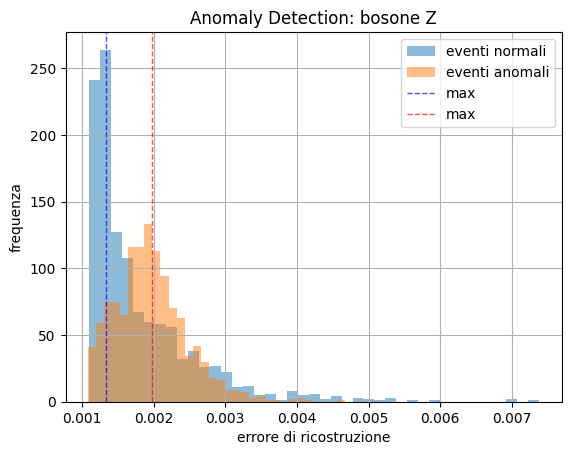

In [ ]:
# Distribuzioni degli errori di ricostruzione

model.eval()
test_loss = []
Z_loss = []
y_true = []

criterion = nn.BCELoss()

with torch.no_grad():
  for xb, labels in test_dl:
    xb, labels = xb.to(device), labels.to(device)
    xhat = model(xb)
    xloss = criterion(xhat, xb)
    test_loss.append(xloss.item())
    # Normalizzazione etichette: 0 e 1 -> 0 (normali)
    labels = labels.cpu().numpy()
    labels = np.array([0 if label in [0, 1] else 1 for label in labels])
    y_true.extend(labels)

  for yb, labels in Z_dl:
    yb, labels = yb.to(device), labels.to(device)
    yhat = model(yb)
    yloss = criterion(yhat, yb)
    Z_loss.append(yloss.item())
    # Normalizzazione etichette: 4 -> 1 (anomali)
    labels = labels.cpu().numpy()
    labels = np.array([0 if label in [0, 1] else 1 for label in labels])
    y_true.extend(labels)

# Calcola le medie delle loss
average_test_loss = sum(test_loss) / len(test_loss)
std_test_loss = np.std(test_loss)
sem_test_loss = std_test_loss / np.sqrt(len(test_loss))  # Errore standard della media

average_Z_loss = sum(Z_loss) / len(Z_loss)
std_Z_loss = np.std(Z_loss)
sem_Z_loss = std_Z_loss / np.sqrt(len(Z_loss))  # Errore standard della media

# Istogrammi
test_hist, test_bins = np.histogram(test_loss, bins='auto')
Z_hist, Z_bins = np.histogram(Z_loss, bins='auto')

# Trovo il valore di loss corrispondente al picco di frequenza
test_peak_idx = np.argmax(test_hist)
test_peak_loss = (test_bins[test_peak_idx] + test_bins[test_peak_idx + 1]) / 2

Z_peak_idx = np.argmax(Z_hist)
Z_peak_loss = (W_bins[Z_peak_idx] + Z_bins[Z_peak_idx + 1]) / 2

print(f"Errore di ricostruzione medio sul test set: {average_test_loss} +\- {sem_test_loss}")
print(f"Errore di ricostruzione medio sul bosone Z set:    {average_Z_loss} +\- {sem_Z_loss}")
print(f"Massimo della distribuzione dell'errore di ricostruzione sul test set: {test_peak_loss:.6f}")
print(f"Massimo della distribuzione dell'errore di ricostruzione sul bosone Z Set:    {Z_peak_loss:.6f}")
print(f"Distanza tra i massimi: {(Z_peak_loss-test_peak_loss):.7f}")

plt.hist(test_loss, bins='auto', label='eventi normali', alpha=0.5)
plt.hist(Z_loss[:len(test_loss)], bins='auto', label='eventi anomali', alpha=0.5)
plt.axvline(test_peak_loss, color='b', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(Z_peak_loss, color='r', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.xlabel("errore di ricostruzione")
plt.ylabel("frequenza")
plt.title("Anomaly Detection: bosone Z")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Incertezza sul valore massimo della distribuzione: uso la deviazione standard dei valori vicini al massimo
import math

# TEST
bin_width = test_bins[1] - test_bins[0]
window_width = 1*bin_width
window_min = test_peak_loss - window_width / 2
window_max = test_peak_loss + window_width / 2

losses_in_window = [loss for loss in test_loss if window_min <= loss <= window_max]

if len(losses_in_window) > 1:
    std_dev_peak_test = np.std(losses_in_window)
else:
    std_dev_peak_test = 0

print(f"Picco di frequenza (test): {test_peak_loss} +/- {std_dev_peak_test}")


# BOSONE Z
bin_width = Z_bins[1] - Z_bins[0]
window_width = 2*bin_width
window_min = Z_peak_loss - window_width / 2
window_max = Z_peak_loss + window_width / 2

losses_in_window = [loss for loss in Z_loss if window_min <= loss <= window_max]

if len(losses_in_window) > 1:
    std_dev_peak_Z = np.std(losses_in_window)
else:
    std_dev_peak_Z = 0

print(f"Picco di frequenza (W): {Z_peak_loss} +/- {std_dev_peak_Z}")

# Distanza
print(f'\nDistanza tra i massimi: {-test_peak_loss + Z_peak_loss} +\- {math.sqrt( std_dev_peak_test**2 + std_dev_peak_Z**2 )}')

Picco di frequenza (test): 0.0013273330802870231 +/- 4.322582479011422e-05
Picco di frequenza (W): 0.001971669809646764 +/- 3.6723353858190715e-05

Distanza tra i massimi: 0.0006443367293597407 +\- 5.671927932704667e-05


AUC: 0.654721 ± 0.010264
Soglia ottimale: 0.001667 ± 0.000015
Precision: 0.899790 ± 0.004300
Recall: 0.723423 ± 0.013006
F1 Score: 0.801958 ± 0.008317


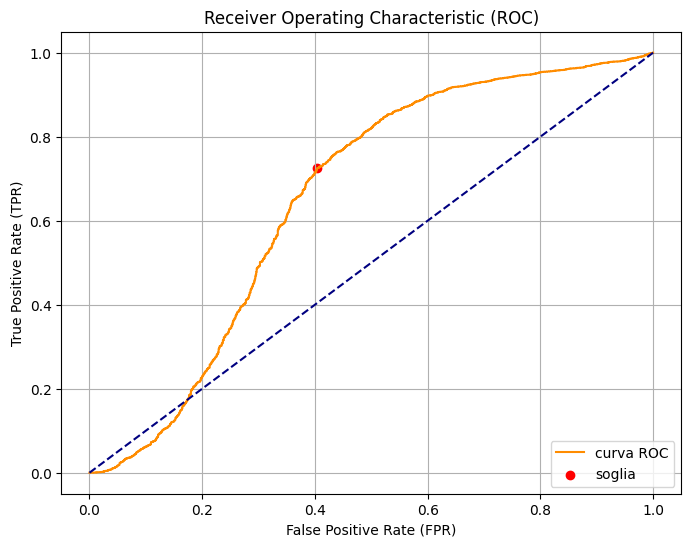

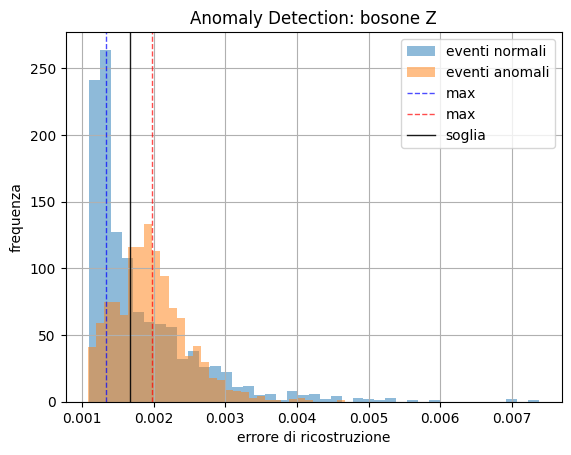

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

all_losses = np.concatenate((test_loss, Z_loss))
y_true = np.array(y_true)

def compute_metrics(y_true_sample, all_losses_sample):
    fpr, tpr, thresholds = roc_curve(y_true_sample, all_losses_sample)
    roc_auc = auc(fpr, tpr)

    optimal_idx = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
    optimal_threshold = thresholds[optimal_idx]

    # Predizioni usando la soglia ottimale
    y_pred_sample = (all_losses_sample > optimal_threshold).astype(int)

    # Calcolo metriche
    precision = precision_score(y_true_sample, y_pred_sample)
    recall = recall_score(y_true_sample, y_pred_sample)
    f1 = f1_score(y_true_sample, y_pred_sample)

    return roc_auc, optimal_threshold, precision, recall, f1, fpr, tpr, optimal_idx

# Bootstrapping
n_bootstraps = 1000
rng = np.random.RandomState(42)

roc_aucs, thresholds, precisions, recalls, f1_scores = [], [], [], [], []
for _ in range(n_bootstraps):
    indices = rng.choice(np.arange(len(y_true)), size=len(y_true), replace=True)
    y_true_sample = y_true[indices]
    all_losses_sample = all_losses[indices]

    metrics = compute_metrics(y_true_sample, all_losses_sample)
    roc_aucs.append(metrics[0])
    thresholds.append(metrics[1])
    precisions.append(metrics[2])
    recalls.append(metrics[3])
    f1_scores.append(metrics[4])

# Calcolo statistiche
roc_auc_mean, roc_auc_std = np.mean(roc_aucs), np.std(roc_aucs)
optimal_threshold_mean, optimal_threshold_std = np.mean(thresholds), np.std(thresholds)
precision_mean, precision_std = np.mean(precisions), np.std(precisions)
recall_mean, recall_std = np.mean(recalls), np.std(recalls)
f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)

print(f"AUC: {roc_auc_mean:.6f} ± {roc_auc_std:.6f}")
print(f"Soglia ottimale: {optimal_threshold_mean:.6f} ± {optimal_threshold_std:.6f}")
print(f"Precision: {precision_mean:.6f} ± {precision_std:.6f}")
print(f"Recall: {recall_mean:.6f} ± {recall_std:.6f}")
print(f"F1 Score: {f1_mean:.6f} ± {f1_std:.6f}")

# Plot della curva ROC (dall'ultimo bootstrap)
fpr, tpr, thresholds = roc_curve(y_true, all_losses)
optimal_idx = np.argmin(np.sqrt(fpr**2 + (1 - tpr)**2))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"curva ROC", color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"soglia")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plot istogrammi con threshold
plt.hist(test_loss, bins='auto', label='eventi normali', alpha=0.5)
plt.hist(Z_loss[:len(test_loss)], bins='auto', label='eventi anomali', alpha=0.5)
plt.axvline(test_peak_loss, color='b', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(Z_peak_loss, color='r', linestyle='--', linewidth=1, label=f'max', alpha=0.7)
plt.axvline(optimal_threshold_mean, color='black', linestyle='-', linewidth=1, label=f'soglia', alpha=0.9)
plt.xlabel("errore di ricostruzione")
plt.ylabel("frequenza")
plt.title("Anomaly Detection: bosone Z")
plt.legend()
plt.grid()
plt.show()